# Question 2
This sections wants to answer the question:
> Are reviews more subjective for some categories of products than for others, based on sentiment analysis?

This question could be rally interesting For this reason this section covers loading, sampling and transforming data to further analys it and draw conclusions. 

## Imports
This section contains all the imports needed to execute all further cells.

In [1]:
import pyspark.pandas as ps
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf, count, col, coalesce, lit, avg
from pyspark.sql.types import StringType, DoubleType

/home/maxkleinegger/.cache/pypoetry/virtualenvs/tu-dopp-ws23-jFqIN7wz-py3.11/lib/python3.11/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/22 18:38:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Load and calculate needed data
This section applies our sentiment analysis to all data points. To do our analysis we used [TextBlob](google.at), which is the only easy accesible library as far as we know which can return a subjectivity score from [0,1] with 0 meaning very objective and 1 very subjective. We apply this sentiment analysis on the "reviewText" and "summary" attribute, to later compare them. Further more we classify those scores into one of 4 values [very_subjective, subjective, very_objective, objective], with each making 25% on the scale. The reason for this thresholds were discussed in the group and said that < 0.25 and > 0.75 is an indication for very, whereas in between we are only subjective and objective. Everything smaller or equal than 0.5 is objective, the reason to include 0.5 to be objective is very simple and comes from the fact that a "neutral" text is rather objective than subjective.
To process all the data, we apply the sentiment analsyis to each categories parquet and save the transformed ones, afterwards we simply combine into a big data file which is the base for all further computations. Furthermore to reduce compute time, we simply save only the necessary data and drop each feature which we don't plan on using.

In [4]:
categories = ['AMAZON_FASHION', 'All_Beauty', 'Appliances', 'Arts_Crafts_and_Sewing', 'Automotive', 'Books', 'CDs_and_Vinyl', 'Cell_Phones_and_Accessories', 'Clothing_Shoes_and_Jewelry', 'Digital_Music', 'Electronics', 'Gift_Cards', 'Grocery_and_Gourmet_Food', 'Home_and_Kitchen', 'Industrial_and_Scientific', 'Kindle_Store', 'Luxury_Beauty', 'Magazine_Subscriptions', 'Movies_and_TV', 'Musical_Instruments', 'Office_Products', 'Patio_Lawn_and_Garden', 'Pet_Supplies', 'Prime_Pantry', 'Software', 'Sports_and_Outdoors', 'Tools_and_Home_Improvement', 'Toys_and_Games', 'Video_Games']

In [5]:
from textblob import TextBlob

def apply_sentiment_analysis(df):
    df = df[["category", "overall", "verified", "vote", "summary", "reviewText", "reviewTime"]]
    df = df.to_spark(index_col=["reviewerID", "asin"])

    calculate_subjectivity = udf(lambda x: TextBlob(x).subjectivity if x else 0.5, DoubleType())
    calculate_sentiment_subjectivity = udf(
        lambda subjectivity: "very_subjective" if subjectivity >= 0.75 
            else ("subjective" if subjectivity > 0.5 
            else ("very_objective" if subjectivity < 0.25 else "objective")),
        StringType(),
    )

    df = df.withColumn("reviewText-subjectivity", calculate_subjectivity(df["reviewText"]))
    df = df.withColumn("summary-subjectivity", calculate_subjectivity(df["summary"]))

    df = df[["category", "overall", "verified", "vote", "reviewTime", "reviewText-subjectivity", "summary-subjectivity"]]

    df = df.withColumn("reviewText-sentiment-subjectivity", calculate_sentiment_subjectivity(df["reviewText-subjectivity"]))
    df = df.withColumn("summary-sentiment-subjectivity", calculate_sentiment_subjectivity(df["summary-subjectivity"]))
    return df

In [6]:
for category in categories:
    print(f"reading and transforming {category}...")
    #df = ps.read_parquet(f"/data/{category}.parquet", index_col=["reviewerID", "asin"])
    #data_sentiment = apply_sentiment_analysis(df)
    #data_sentiment.write.parquet(f"/data/question1_{category}_transformed.parquet", mode="overwrite")
    print(f"finished...")

reading and transforming AMAZON_FASHION...
finished...
reading and transforming All_Beauty...
finished...
reading and transforming Appliances...
finished...
reading and transforming Arts_Crafts_and_Sewing...
finished...
reading and transforming Automotive...
finished...
reading and transforming Books...
finished...
reading and transforming CDs_and_Vinyl...
finished...
reading and transforming Cell_Phones_and_Accessories...
finished...
reading and transforming Clothing_Shoes_and_Jewelry...
finished...
reading and transforming Digital_Music...
finished...
reading and transforming Electronics...
finished...
reading and transforming Gift_Cards...
finished...
reading and transforming Grocery_and_Gourmet_Food...
finished...
reading and transforming Home_and_Kitchen...
finished...
reading and transforming Industrial_and_Scientific...
finished...
reading and transforming Kindle_Store...
finished...
reading and transforming Luxury_Beauty...
finished...
reading and transforming Magazine_Subscrip

24/01/22 00:40:35 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [7]:
mode = "overwrite"
for category in categories:
    print(f"reading and adding {category}...")
    #df = spark.read.parquet(f"/data/question1_{category}_transformed.parquet")
    #df.write.parquet("/data/data_question1.parquet", mode=mode)
    #mode = "append"
    print(f"finished...")

reading and adding AMAZON_FASHION...
finished...
reading and adding All_Beauty...
finished...
reading and adding Appliances...
finished...
reading and adding Arts_Crafts_and_Sewing...
finished...
reading and adding Automotive...
finished...
reading and adding Books...
finished...
reading and adding CDs_and_Vinyl...
finished...
reading and adding Cell_Phones_and_Accessories...
finished...
reading and adding Clothing_Shoes_and_Jewelry...
finished...
reading and adding Digital_Music...
finished...
reading and adding Electronics...
finished...
reading and adding Gift_Cards...
finished...
reading and adding Grocery_and_Gourmet_Food...
finished...
reading and adding Home_and_Kitchen...
finished...
reading and adding Industrial_and_Scientific...
finished...
reading and adding Kindle_Store...
finished...
reading and adding Luxury_Beauty...
finished...
reading and adding Magazine_Subscriptions...
finished...
reading and adding Movies_and_TV...
finished...
reading and adding Musical_Instruments.

In [4]:
df = spark.read.parquet("/data/data_question2.parquet")
df.show(5)

+--------+-------+--------+----+-----------+-----------------------+--------------------+---------------------------------+------------------------------+
|category|overall|verified|vote| reviewTime|reviewText-subjectivity|summary-subjectivity|reviewText-sentiment-subjectivity|summary-sentiment-subjectivity|
+--------+-------+--------+----+-----------+-----------------------+--------------------+---------------------------------+------------------------------+
|   Books|    5.0|    true|NULL| 04 7, 2017|                    0.9|  0.8450000000000001|                  very_subjective|               very_subjective|
|   Books|    5.0|    true|NULL|01 11, 2016|                   0.75|                 1.0|                  very_subjective|               very_subjective|
|   Books|    5.0|   false|NULL|07 15, 2014|                    1.0|                 0.0|                  very_subjective|                very_objective|
|   Books|    4.0|   false|   4|10 24, 2011|    0.26666666666666666|  

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pyspark.pandas as ps
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf, count, col, coalesce, lit, avg
from pyspark.sql.types import StringType, DoubleType
from textblob import TextBlob
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

def calculate_vader_sentiment(df, mode):
    df["text"] = df["summary"] + " - " + df["reviewText"]
    df = df[["category", "overall", "verified", "text"]]  # .reset_index()
    df = df.to_spark(index_col=['reviewerID', 'asin'])

    calculate_compound_score = udf(
        lambda x: TextBlob(x).polarity #SentimentIntensityAnalyzer().polarity_scores(x[:50])["compound"]
        if x
        else 0,  # if x else 0
        DoubleType(),
    )

    df = df.withColumn("vader_compound", calculate_compound_score(df["text"]))
    df = df[["category", "overall", "verified", "vader_compound"]]
    calculate_sentiment = udf(
        lambda compound: "very_positive"
        if compound >= 0.6
        else (
            "positive"
            if compound >= 0.2
            else (
                "very_negative"
                if compound <= -0.6
                else ("negative" if compound <= -0.2 else "neutral")
            )
        ),
        StringType(),
    )
    
    df = df.withColumn("sentiment", calculate_sentiment(df["vader_compound"]))

    return df


mode = "overwrite"
for category in categories:
    print(f"reading and transforming {category}...")
    df = ps.read_parquet(f"/data/{category}.parquet", index_col=['reviewerID', 'asin'])
    # data_sentiment = calculate_vader_sentiment(df, mode)
    data_sentiment.write.parquet(f"/data/question1_{category}_transformed.parquet", mode="overwrite")
    print(f"finished...")

reading and transforming AMAZON_FASHION...


finished...
reading and transforming All_Beauty...


finished...
reading and transforming Appliances...


finished...
reading and transforming Arts_Crafts_and_Sewing...


finished...
reading and transforming Automotive...


finished...
reading and transforming Books...


finished...
reading and transforming CDs_and_Vinyl...


finished...
reading and transforming Cell_Phones_and_Accessories...


ERROR:root:KeyboardInterrupt while sending command.                (0 + 8) / 33]
Traceback (most recent call last):
  File "/home/maxkleinegger/.cache/pypoetry/virtualenvs/tu-dopp-ws23-jFqIN7wz-py3.11/lib/python3.11/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/maxkleinegger/.cache/pypoetry/virtualenvs/tu-dopp-ws23-jFqIN7wz-py3.11/lib/python3.11/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
                          ^^^^^^^^^^^^^^^^^^^^^^
  File "/home/maxkleinegger/miniconda3/lib/python3.11/socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
    df_reviewText_reduced = df.groupBy("category", "sentiment").agg(count("*").alias("count"))
    df_reviewText_reduced_wide = df_reviewText_reduced.groupBy("category").pivot("sentiment").sum("count")
    df_reviewText_reduced_wide.fillna(0)
    df_reviewText_reduced_wide = df_reviewText_reduced_wide.withColumn("number_of_reviews", col("very_negative") + col("negative") + col("neutral") + col("positive") + col("very_positive"))
    df_reviewText_average_subjectivity = df.groupBy("category").agg(avg("vader_compound").alias("average_sentiment"))
    df_reviewText_reduced_wide = df_reviewText_reduced_wide.join(df_reviewText_average_subjectivity, "category", "inner")#.write.parquet("/data/data_question1_reduced.parquet", mode=mode)
    df_reviewText_reduced_wide.show()

## Transform data
Another problem with dealing with ~240 million data points, is trying to get them into a format for visualization. Therefore to answer question 2, we need to aggregate some of the data to make it more understandable. Therefore we build a dataset containing the number of records depending on the sentiment group they are aligned to, in addition to the average_subjectivity by category.

In [5]:
def reduce_by_col(df, column, col_agg, groupBy="category"):
    df_reduced = df.groupBy(groupBy, column).agg(count("*").alias("count"))
    df_reduced = df_reduced.groupBy(groupBy).pivot(column).sum("count")
    df_reduced.fillna(0)
    df_reduced = df_reduced.withColumn("number_of_reviews", col("very_subjective") + col("subjective") + col("objective") + col("very_objective"))
    df_reduced_average = df.groupBy(groupBy).agg(avg(col_agg).alias("average_subjectivity"))
    df_reduced = df_reduced.join(df_reduced_average, groupBy, "inner")
    return df_reduced

df_reduced_reviewText = reduce_by_col(df, "reviewText-sentiment-subjectivity", "reviewText-subjectivity")
df_reduced_summary = reduce_by_col(df, "summary-sentiment-subjectivity", "summary-subjectivity")

In [6]:
df_reduced_reviewText.show(5)

+--------------------+---------+----------+--------------+---------------+-----------------+--------------------+
|            category|objective|subjective|very_objective|very_subjective|number_of_reviews|average_subjectivity|
+--------------------+---------+----------+--------------+---------------+-----------------+--------------------+
|               Books| 16829582|  24234275|       2932914|        7314850|         51311621|  0.5452980275126829|
|Clothing_Shoes_an...|  8246891|  14457810|       2290556|        7296842|         32292099|  0.5801018798095543|
|         Electronics|  6102474|   8847312|       2085293|        3959274|         20994353|  0.5409362693301403|
|    Home_and_Kitchen|  5443024|   9496656|       1718008|        5270880|         21928568|  0.5793498237799676|
| Sports_and_Outdoors|  3555056|   5542168|       1155023|        2728590|         12980837|  0.5569036105078844|
+--------------------+---------+----------+--------------+---------------+--------------

In [7]:
df_reduced_summary.show(5)

+--------------------+---------+----------+--------------+---------------+-----------------+--------------------+
|            category|objective|subjective|very_objective|very_subjective|number_of_reviews|average_subjectivity|
+--------------------+---------+----------+--------------+---------------+-----------------+--------------------+
|               Books|  6967501|   8300310|      22023207|       14020603|         51311621|  0.3999373124258183|
|Clothing_Shoes_an...|  3442054|   5528059|      15042627|        8279359|         32292099|  0.3793427830961197|
|         Electronics|  2396591|   3450998|       9778152|        5368612|         20994353|  0.3718752873310944|
|    Home_and_Kitchen|  2256827|   3506357|      10078101|        6087283|         21928568|  0.3880506729403757|
| Sports_and_Outdoors|  1402512|   2138405|       6137972|        3301948|         12980837| 0.36825653077297166|
+--------------------+---------+----------+--------------+---------------+--------------

## Analyse data
In this section, we want to analyse the data and therefore try to answer the question. To answer our question we start by observing a potential difference between the subjectivity of the reviewtext and the summary.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

### Distribution
First we analyse the distribution of our subjectivity and summary metric across all different categories. The plot below show them. We can see that mostly all categories follow a normal distribution which peaks at the ends, which indicates the amount of very objective and very subjective reviews. If you look at the category `Gift_Cards` you see that those contain a big percentage of objective reviews in comparison to all other categories.

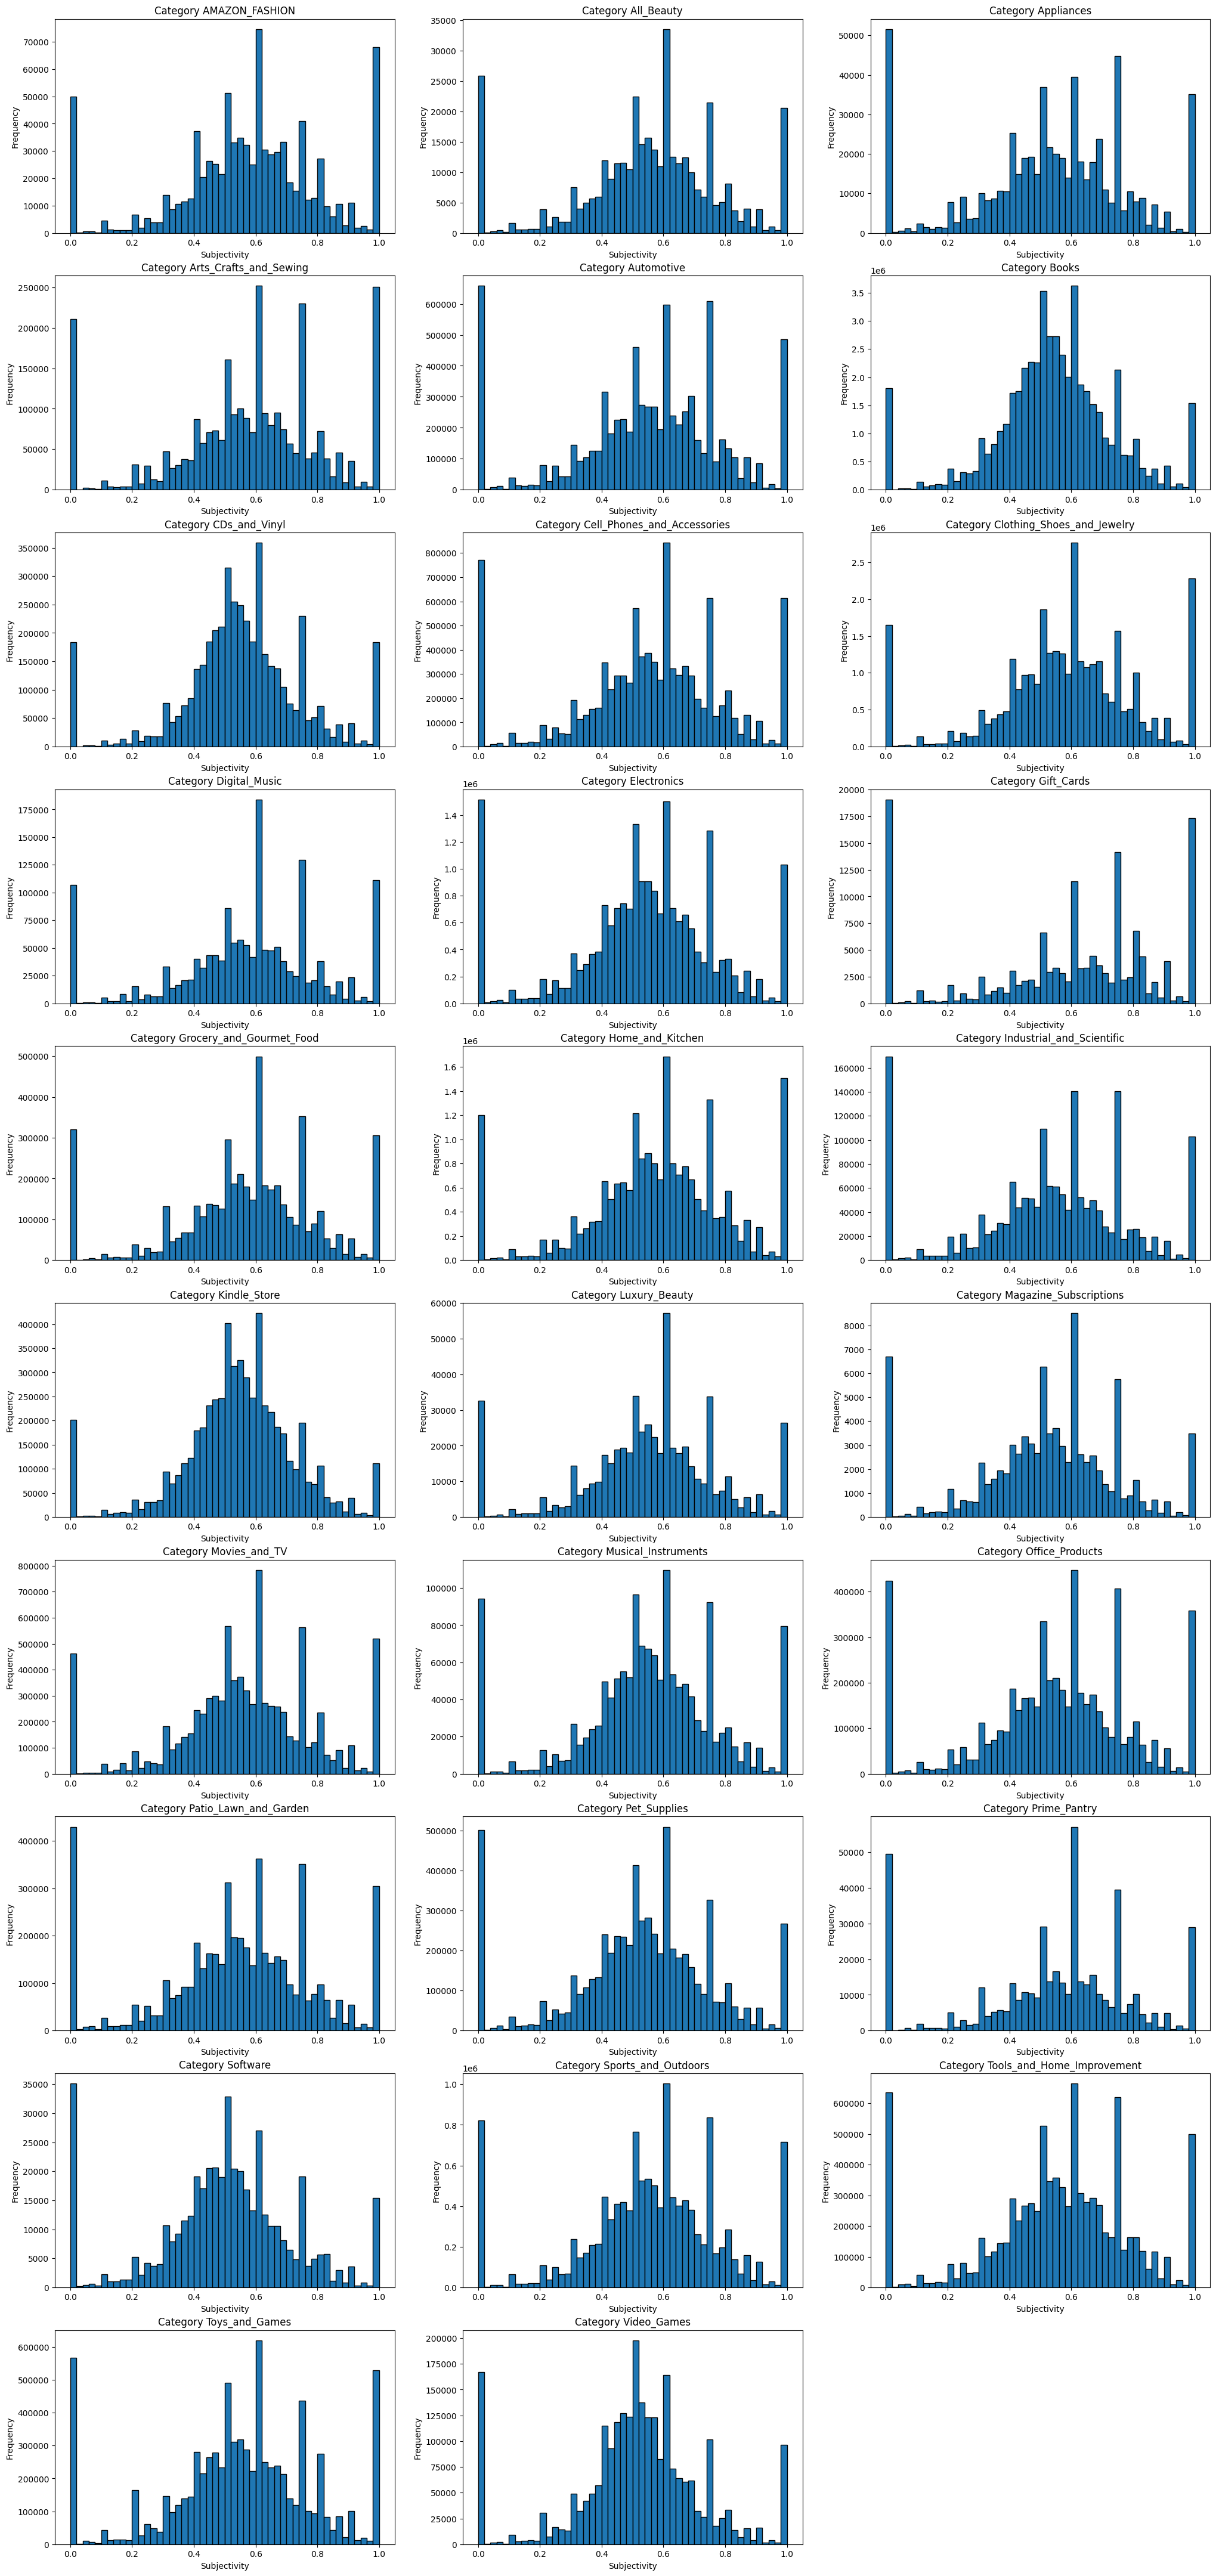

In [29]:
def plot_distributions_for_all_cat(df, col):
    fig, axes = plt.subplots(len(categories)//3+1, 3, figsize=(25, 55))
    axes = axes.flatten()

    for i, category in enumerate(categories):
        dist = df.filter(df.category == category).select(col).rdd.flatMap(lambda x: x).collect()

        axes[i].hist(dist, bins=50, edgecolor='black')
        axes[i].set_title(f'Category {category}')
        axes[i].set_xlabel('Subjectivity')
        axes[i].set_ylabel('Frequency')

    fig.delaxes(axes[-1])
    plt.show()


In [ ]:
plot_distributions_for_all_cat(df, "reviewText-subjectivity")

In [ ]:
plot_distributions_for_all_cat(df, "summary-subjectivity")

In [11]:
def plot_cat_sentiment(df):
    # Calculate comulative values
    com_df_cat_sentiment = df.sort("average_subjectivity", ascending=[False]).toPandas().copy()
    sentiments = ['very_objective', 'objective', 'subjective', 'very_subjective']
    for i in range(0, 3):
        com_df_cat_sentiment[sentiments[i+1]] += com_df_cat_sentiment[sentiments[i]]
    # Normalize and convert to Percent
    for i in range(0, 4):
        com_df_cat_sentiment[sentiments[i]] *= 100 / com_df_cat_sentiment[sentiments[3]]


    # Pastel-toned colors
    pastel_palette = ["#87CEEB", "#66CDAA", "#F0E68C", "#FFA07A", "#F08080"]

    # Plotting the stacked horizontal bar plot with pastel-toned colors
    plt.figure(figsize=(10, 6))
    ax1 = sns.barplot(x='very_subjective', y='category', data=com_df_cat_sentiment, orient='h', color=pastel_palette[0], label='Very subjective')
    sns.barplot(x='subjective', y='category', data=com_df_cat_sentiment, orient='h', color=pastel_palette[1], label='subjective')
    sns.barplot(x='objective', y='category', data=com_df_cat_sentiment, orient='h', color=pastel_palette[3], label='objective')
    sns.barplot(x='very_objective', y='category', data=com_df_cat_sentiment, orient='h', color=pastel_palette[4], label='Very objective')

    # Annotate each bar with the corresponding average rating value
    for i, row in com_df_cat_sentiment.iterrows():
        ax1.text(row['very_subjective'], i, f'{row["average_subjectivity"]:.2f}', ha='left', va='center', color='black')

    # Customize plot labels and title
    ax1.set_xlabel('%')
    ax1.set_ylabel('Category')
    ax1.set_title('Subjectivity Distribution of Reviews for each Category')

    # Tight layout and legend
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(0.9, 0.8), title='text Average Subjectivity', alignment='left')

    # Show the plot
    plt.show()

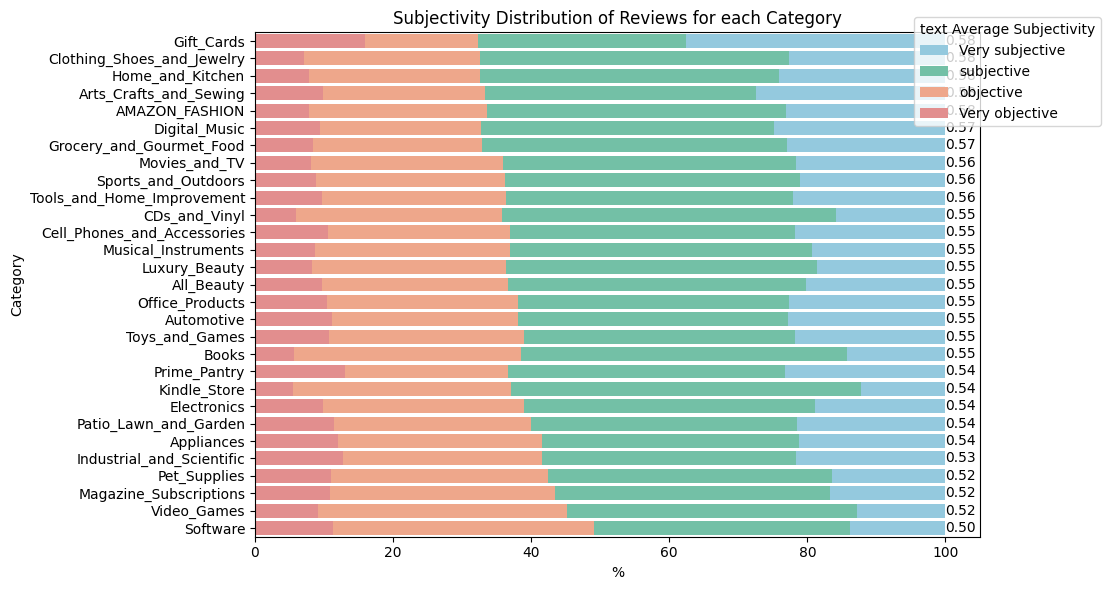

In [12]:
plot_cat_sentiment(df_reduced_reviewText)

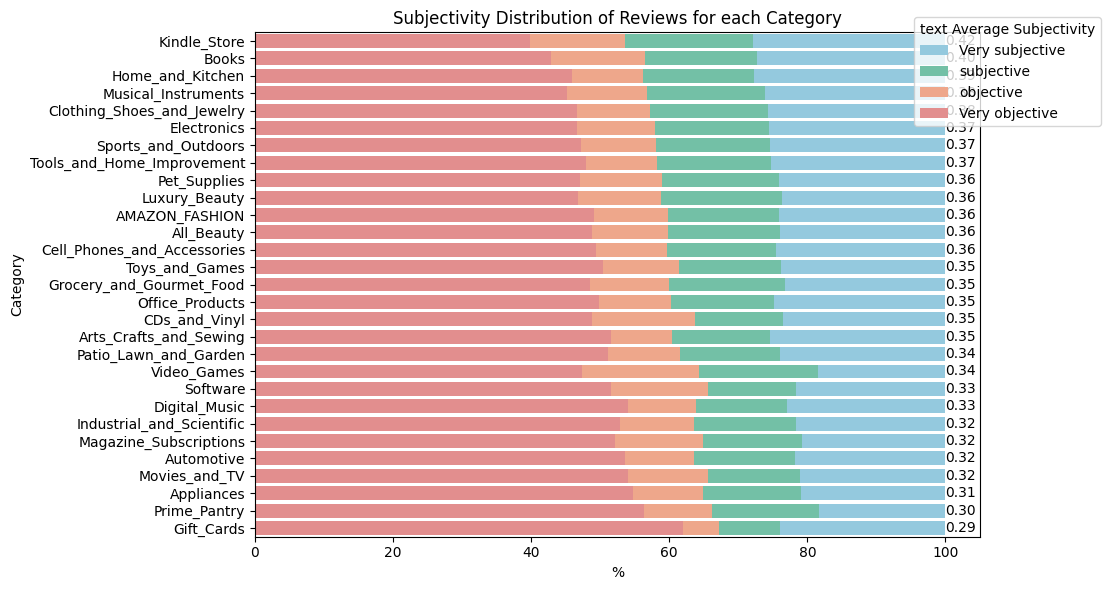

In [13]:
plot_cat_sentiment(df_reduced_summary)

Afterwards, we compare the average subjectivity of all categories, with a boxplot drawn in the cell below. There we see an outlier, which is another indication for a category that is significantly less subjective than others.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2503bf5750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2503bf7410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2503d25310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2503bf5290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2503bf59d0>],
 'means': []}

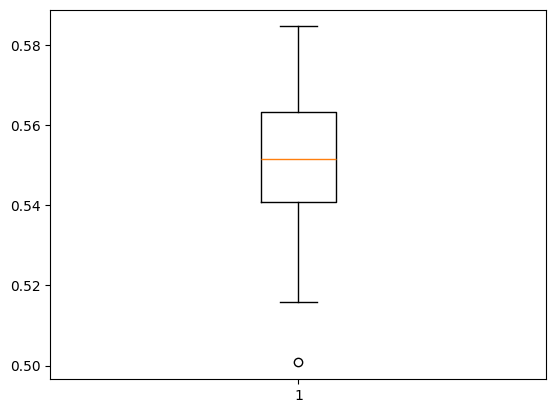

In [18]:
dist = df_reduced_reviewText.select("average_subjectivity").rdd.flatMap(lambda x: x).collect()
plt.boxplot(dist)

To further prove our thesis, we plot the min-average, max-average and average of all averages concerning the subjectivity.

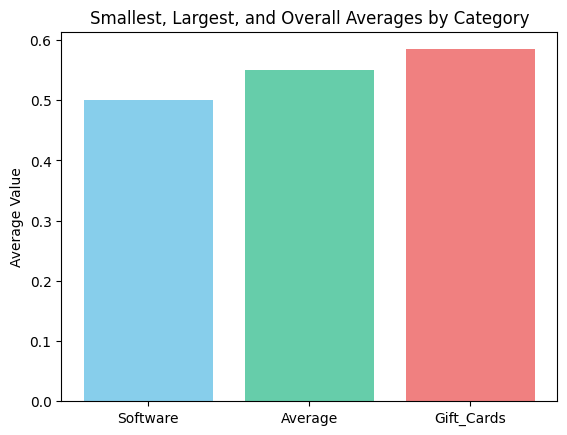

In [32]:
def plot_min_max_average(df):
    # Calculate the smallest, largest, and overall average
    min_avg = df.loc[df['average_subjectivity'].idxmin()]
    max_avg = df.loc[df['average_subjectivity'].idxmax()]
    overall_avg = df['average_subjectivity'].mean()

    # Plot the results
    fig, ax = plt.subplots()

    # Plot the bars with category information
    ax.bar(f"{min_avg['category']}", min_avg['average_subjectivity'], color='#87CEEB')
    ax.bar("Average", overall_avg, color='#66CDAA')
    ax.bar(f"{max_avg['category']}", max_avg['average_subjectivity'], color='#F08080')

    # Set labels and title
    plt.ylabel("Average Value")
    plt.title("Smallest, Largest, and Overall Averages by Category")

    # Show the plot
    plt.show()

    
    
plot_cat_sentiment(df_reduced_reviewText.filter(df_reduced_reviewText))

There, we see a big difference between min and max and finally try to prove it with a testing in the cell below.

In [16]:
from scipy.stats import mannwhitneyu

distribution_software = df.filter(col("category") == "Software").select("reviewText-subjectivity").rdd.flatMap(lambda x: x).collect()
distribution_gift_card = df.filter(col("category") == "Gift_Cards").select("reviewText-subjectivity").rdd.flatMap(lambda x: x).collect()

_, p_value = mannwhitneyu(distribution_software, distribution_gift_card)

# Set significance level
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print(f"The two distributions are statistically significantly different, with a p-value of {p_value}")

The two distributions are statistically significantly different, with a p-value of 0.0


In [27]:
def plot_correlation_stars_sentiment(title, df_stars, df_sentiment, ax):
    df_stars = df_stars.rename(columns={"average_subjectivity": "average_subjectivity_reviewText"})
    df_sentiment = df_sentiment.rename(columns={"average_subjectivity": "average_subjectivity_reviewText"})
    print(df_stars.head())
    df_merged = df_stars.merge(df_sentiment, on='category', how='left')

    # Plotting the stacked horizontal bar plot with pastel-toned colors
    axes = sns.scatterplot(x='average_subjectivity_reviewText', y='average_sentiment_summary', data=df_merged, ax=ax, color="#87CEEB")

    # Annotate each point with the category name
    for i, row in df_merged.iterrows():
        axes.annotate(row['category'], (row['average_rating'], row['average_sentiment']),
                     textcoords="offset points", xytext=(5, 5), ha='center', fontsize=8)


    # Customize plot labels and title
    axes.set_xlabel('Average Star Rating')
    axes.set_ylabel('Average Sentiment Score')
    axes.set_title(title)

#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
#fig.suptitle('Correlation between Star Rating and Sentiment Score', y=1.05)
plot_correlation_stars_sentiment('Original Dataset TextBlob', df_reduced_reviewText.toPandas(), df_reduced_summary.toPandas(), None)
#plot_correlation_stars_sentiment('Sample Data TextBlob', data_sample_cat_stars, data_sample_textblob_cat_sentiment, axes[1])
#plot_correlation_stars_sentiment('Sample Data Vader Sentiment', data_sample_cat_stars, data_sample_vader_cat_sentiment, axes[2])

# Tight layout and legend
plt.tight_layout()

# Show the plot
plt.show()

                     category  objective  subjective  very_objective  \
0                       Books   16829582    24234275         2932914   
1  Clothing_Shoes_and_Jewelry    8246891    14457810         2290556   
2                 Electronics    6102474     8847312         2085293   
3            Home_and_Kitchen    5443024     9496656         1718008   
4         Sports_and_Outdoors    3555056     5542168         1155023   

   very_subjective  number_of_reviews  average_subjectivity_reviewText  
0          7314850           51311621                         0.545298  
1          7296842           32292099                         0.580102  
2          3959274           20994353                         0.540936  
3          5270880           21928568                         0.579350  
4          2728590           12980837                         0.556904  


ValueError: Could not interpret value `average_subjectivity_reviewText` for `x`. An entry with this name does not appear in `data`.

### Summary
Second we analyse the distribution of our subjectivity metric across all different categories. The plot below show them. We can see that mostly all categories follow a normal distribution which peaks at the ends, which indicates the amount of very objective and very subjective reviews. If you look at the category `Gift_Cards` you see that those contain a big percentage of objective reviews in comparison to all other categories.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(categories)//3+1, 3, figsize=(25, 55))
axes = axes.flatten()

for i, category in enumerate(categories):
    dist = df.filter(df.category == category).select("summary-subjectivity").rdd.flatMap(lambda x: x).collect()

    axes[i].hist(dist, bins=50, edgecolor='black')
    axes[i].set_title(f'Category {category}')
    axes[i].set_xlabel('Subjectivity')
    axes[i].set_ylabel('Frequency')

fig.delaxes(axes[-1])
plt.show()

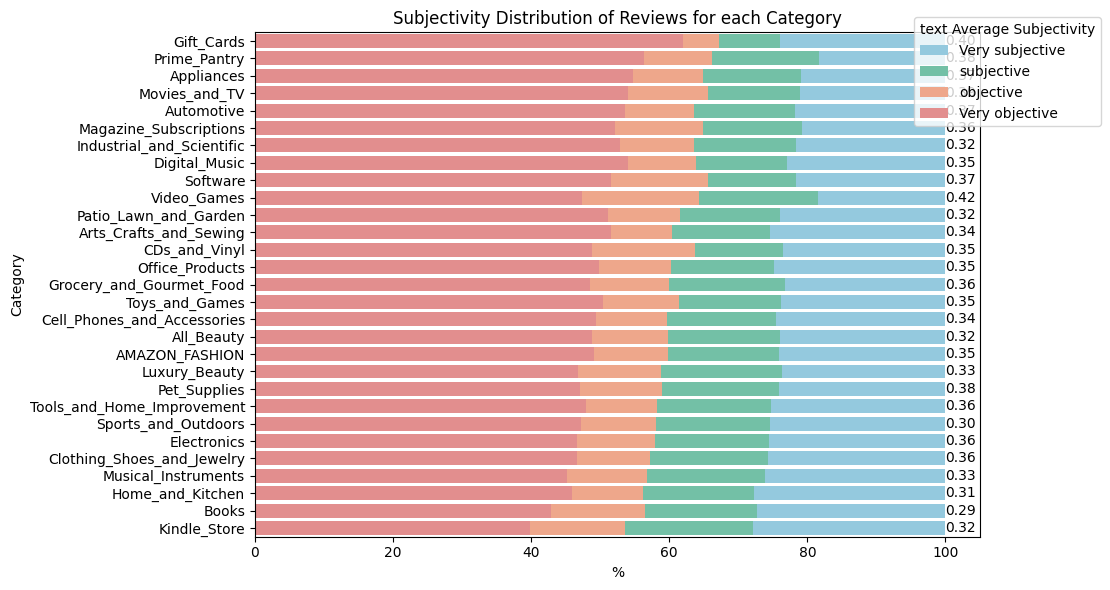

In [25]:
plot_cat_sentiment(df_reduced_summary)

Afterwards, we compare the average subjectivity of all categories, with a boxplot drawn in the cell below. There we see an outlier, which is another indication for a category that is significantly less subjective than others.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f251e008190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f254d9a50d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f251dfff810>],
 'medians': [<matplotlib.lines.Line2D at 0x7f254d9bf890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f254d9bef10>],
 'means': []}

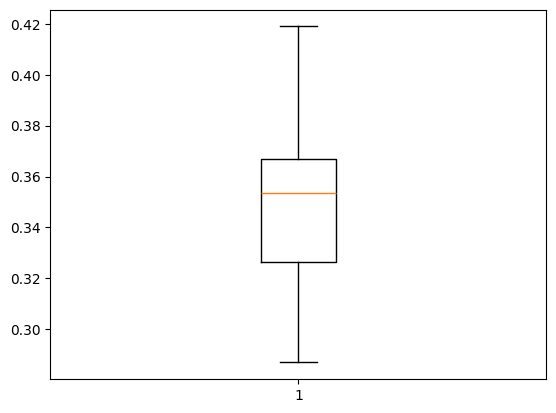

In [26]:
dist = df_reduced_summary.select("average_subjectivity").rdd.flatMap(lambda x: x).collect()
plt.boxplot(dist)

To further prove our thesis, we plot the min-average, max-average and average of all averages concerning the subjectivity.

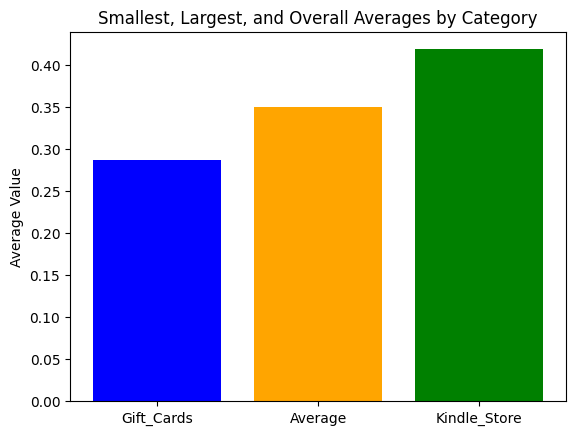

In [27]:
plot_min_max_average(df_reduced_summary.toPandas())

There, we see a big difference between min and max and finally try to prove it with a testing in the cell below.

In [ ]:
from scipy.stats import mannwhitneyu


distribution_software = data.filter(col("category") == "Software").select("reviewText-subjectivity").rdd.flatMap(lambda x: x).collect()
distribution_gift_card = data.filter(col("category") == "Gift_Cards").select("reviewText-subjectivity").rdd.flatMap(lambda x: x).collect()

t_statistic, p_value = mannwhitneyu(distribution_software, distribution_gift_card)

# Set significance level
alpha = 0.05

# Check for statistical significance
if p_value < alpha:
    print(f"The two distributions are statistically significantly different, with a p-value of {p_value}")

The two distributions are statistically significantly different, with a p-value of 0.0


In [ ]:
import numpy as np
from scipy.stats import kruskal

distributions = [data.filter(col("category") == c).select("reviewText-subjectivity").rdd.flatMap(lambda x: x).collect() for c in categories[:6]]

F, p = kruskal(*distributions)
print(F)
print(p)

209166.02266454516
0.0


### Comparison
Lastly, we want to compare the averages between summary and reviewText, to check wether those are highly related if therefore the summary is a good indication of what to expect in the reviewText.

## Conclusion